In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Iris Data

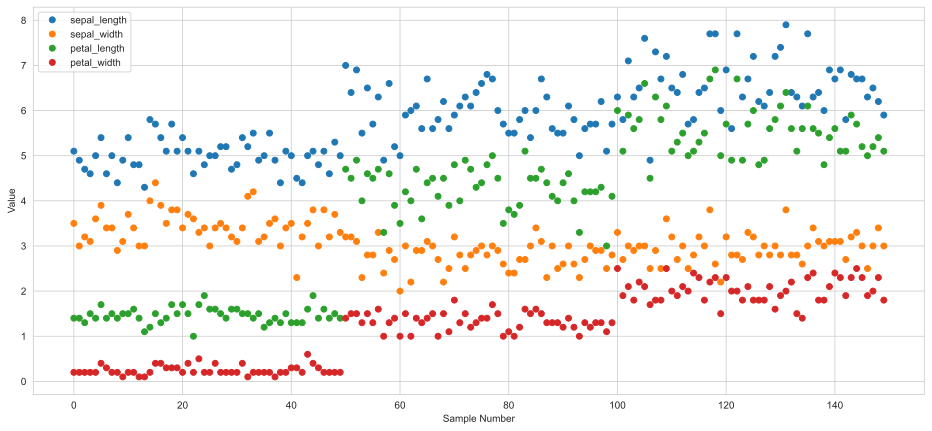

In [2]:
iris_data = sns.load_dataset("iris")

iris_data.plot(marker='o', linestyle='none', figsize=(16, 7))
plt.xlabel("Sample Number")
plt.ylabel("Value");

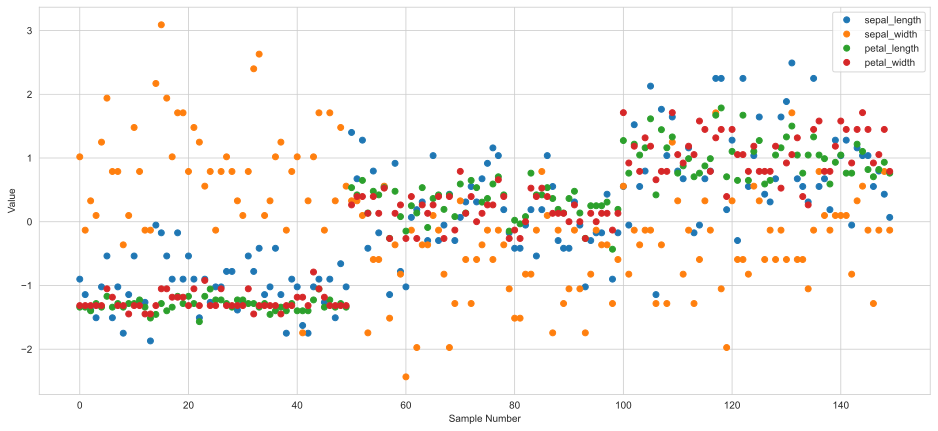

In [3]:
import scipy.stats as stats

iris_data_normalize = iris_data.copy()
col_zscore = iris_data_normalize.keys()
col_zscore = col_zscore.drop("species")
iris_data_normalize[col_zscore] = iris_data_normalize[col_zscore].apply(stats.zscore)

iris_data_normalize.plot(marker='o', linestyle='none', figsize=(16, 7))
plt.xlabel("Sample Number")
plt.ylabel("Value");

In [4]:
def intoTensor(iris_data):
    data_tensor = torch.tensor(iris_data[iris_data.columns[:4]].values).float()
    label_tensor = torch.zeros(len(iris_data), dtype=torch.long)
    label_tensor[iris_data.species == "versicolor"] = 1
    label_tensor[iris_data.species == "virginica"] = 2
    
    return data_tensor, label_tensor

In [5]:
def splitData(iris_data):
    data_tensor, label_tensor = intoTensor(iris_data)
    train_data, test_data, train_labels, test_labels = train_test_split(data_tensor, label_tensor, test_size=0.2)
    
    train_data = TensorDataset(train_data, train_labels)
    test_data = TensorDataset(test_data, test_labels)
    
    train_loader = DataLoader(train_data, shuffle=True, drop_last=True, batch_size=12)
    test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])
    
    return train_loader, test_loader

In [6]:
def irisModel():
    annIris = nn.Sequential(nn.Linear(4, 8), nn.ReLU(), nn.Linear(8, 8), nn.ReLU(), nn.Linear(8, 3))

    loss_fun = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(annIris.parameters(), lr=0.01)

    return annIris, loss_fun, optimizer

In [7]:
num_epochs = 1000

def trainIrisModel(iris_data):

    train_loader, test_loader = splitData(iris_data)
    annIris, loss_fun, optimizer = irisModel()
    
    train_acc = []
    test_acc = []
    
    for epoch in range(num_epochs):
        
        annIris.train()
        batch_acc = []
        
        for x, y in train_loader:
            y_hat = annIris(x)
            
            loss = loss_fun(y_hat, y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batch_acc.append(100*torch.mean((torch.argmax(annIris(x), axis=1) == y).float()).item())
        
        train_acc.append(np.mean(batch_acc))
        
        annIris.eval()
        x, y  = next(iter(test_loader))
        with torch.no_grad():
            test_acc.append(100*torch.mean((torch.argmax(annIris(x), axis=1) == y).float()).item())
        
    return train_acc, test_acc

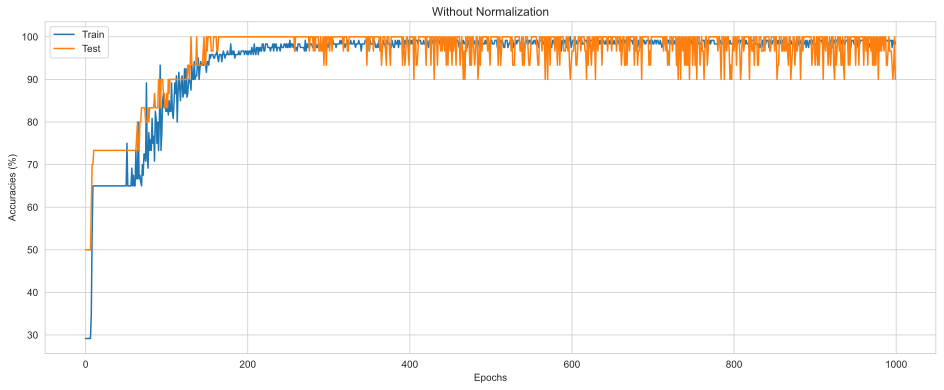

In [8]:
train_acc, test_acc = trainIrisModel(iris_data)

plt.figure(figsize=(16, 6))
plt.plot(train_acc)
plt.plot(test_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracies (%)")
plt.title("Without Normalization")
plt.legend(["Train", "Test"]);

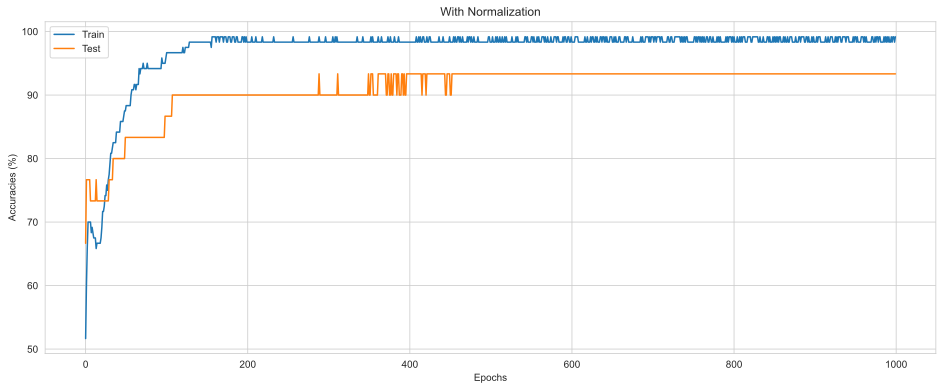

In [9]:
train_acc, test_acc = trainIrisModel(iris_data_normalize)

plt.figure(figsize=(16, 6))
plt.plot(train_acc)
plt.plot(test_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracies (%)")
plt.title("With Normalization")
plt.legend(["Train", "Test"]);

# Wine Quality Data

In [10]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

wine_data = pd.read_csv(url, sep=';')

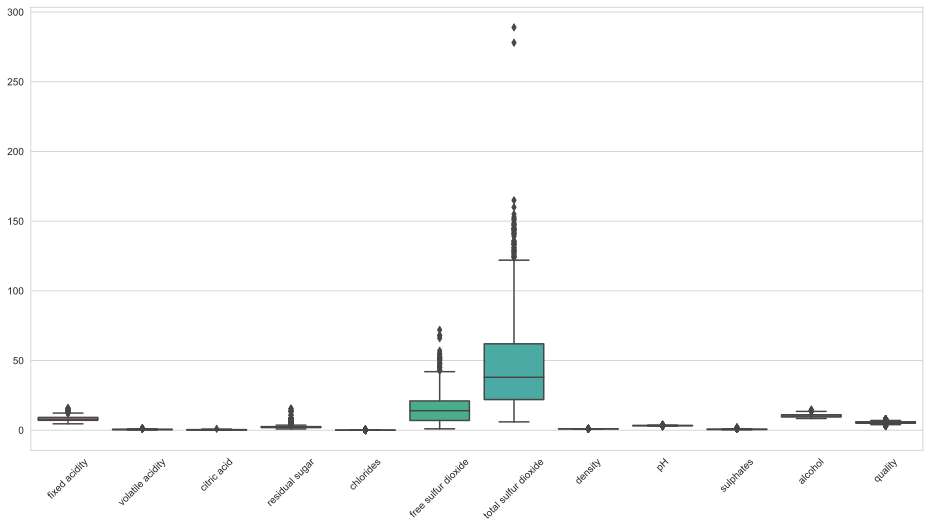

In [11]:
_, ax = plt.subplots(1, figsize=(16, 8))
ax = sns.boxplot(data=wine_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

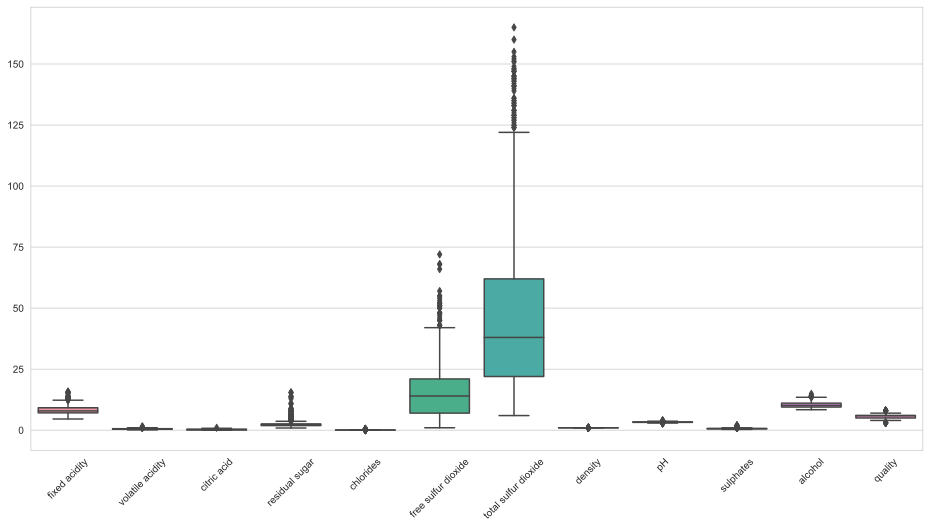

In [12]:
wine_data_normalize = wine_data.copy()
wine_data_normalize = wine_data_normalize[wine_data_normalize['total sulfur dioxide']<200]
_, ax = plt.subplots(1, figsize=(16, 8))
ax = sns.boxplot(data=wine_data_normalize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [13]:
col_zscore = wine_data_normalize.keys()
col_zscore = col_zscore.drop("quality")
wine_data_normalize[col_zscore] = wine_data_normalize[col_zscore].apply(stats.zscore)

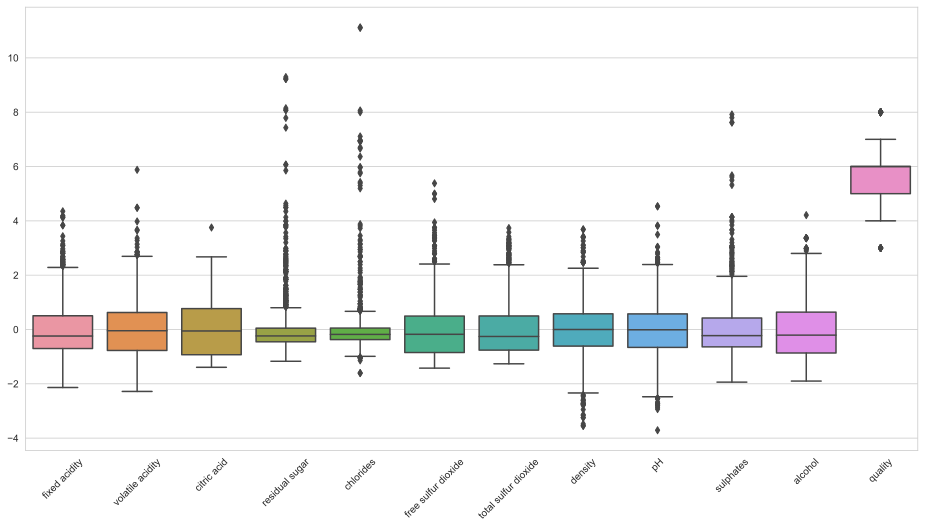

In [14]:
_, ax = plt.subplots(1, figsize=(16, 8))
ax = sns.boxplot(data=wine_data_normalize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [15]:
wine_data["boolQuantity"] = 0
wine_data["boolQuantity"][wine_data["quality"]>5] = 1

wine_data_normalize["boolQuantity"] = 0
wine_data_normalize["boolQuantity"][wine_data_normalize["quality"]>5] = 1

C:\Users\drkum\AppData\Local\Temp\ipykernel_18376\4210429945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data["boolQuantity"][wine_data["quality"]>5] = 1
C:\Users\drkum\AppData\Local\Temp\ipykernel_18376\4210429945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_normalize["boolQuantity"][wine_data_normalize["quality"]>5] = 1


In [16]:
def intoTensor(wine_data):
    data_tensor = torch.tensor(wine_data[col_zscore].values).float()
    label_tensor = torch.tensor(data=wine_data["boolQuantity"].values).float()
    label_tensor = label_tensor[:, None]
    
    return data_tensor, label_tensor

In [17]:
def splitData(wine_data):
    data_tensor, label_tensor = intoTensor(wine_data)
    train_data, test_data, train_labels, test_labels = train_test_split(data_tensor, label_tensor, test_size=0.1)

    train_data = TensorDataset(train_data, train_labels)
    test_data = TensorDataset(test_data, test_labels)

    train_loader = DataLoader(train_data, shuffle=True, drop_last=True, batch_size=256)
    test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

    return train_loader, test_loader

In [18]:
def wineModel():
    annWine = nn.Sequential(nn.Linear(11, 16), nn.ReLU(), nn.Linear(16, 32), nn.ReLU(), nn.Linear(32, 1))

    loss_fun = nn.BCEWithLogitsLoss()

    optimizer = torch.optim.SGD(annWine.parameters(), lr=0.01)

    return annWine, loss_fun, optimizer

In [19]:
num_epochs = 2500

def trainWineModel(wine_data):

    train_loader, test_loader = splitData(wine_data)
    annWine, loss_fun, optimizer = wineModel()

    train_acc = []
    test_acc = []

    for epoch in range(num_epochs):

        annWine.train()
        batch_acc = []

        for x, y in train_loader:
            y_hat = annWine(x)

            loss = loss_fun(y_hat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_acc.append(100*torch.mean(((annWine(x) > 0) == y).float()).item())

        train_acc.append(np.mean(batch_acc))

        annWine.eval()
        x, y  = next(iter(test_loader))
        with torch.no_grad():
            test_acc.append(100*torch.mean(((annWine(x) > 0) == y).float()).item())

    return train_acc, test_acc

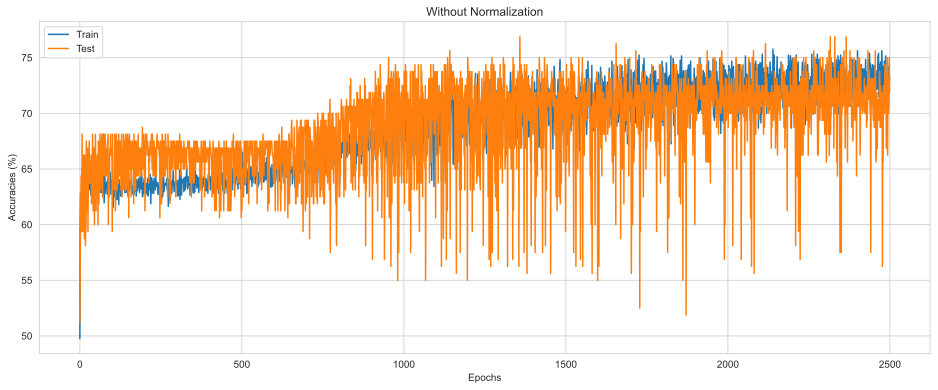

In [20]:
train_acc, test_acc = trainWineModel(wine_data)

plt.figure(figsize=(16, 6))
plt.plot(train_acc)
plt.plot(test_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracies (%)")
plt.title("Without Normalization")
plt.legend(["Train", "Test"]);

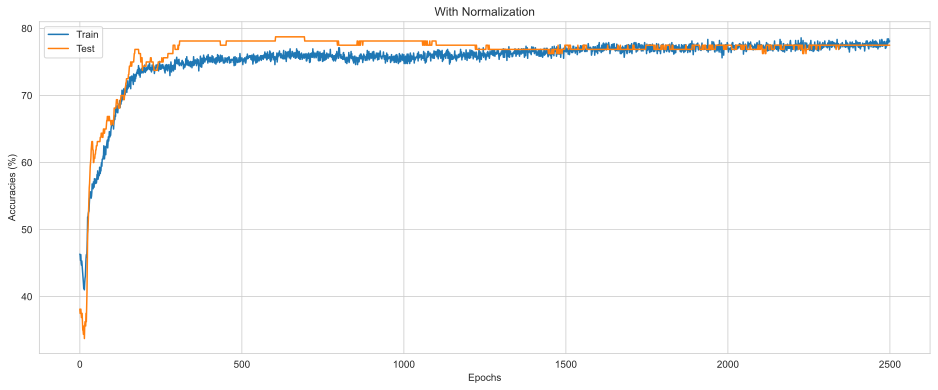

In [21]:
train_acc, test_acc = trainWineModel(wine_data_normalize)

plt.figure(figsize=(16, 6))
plt.plot(train_acc)
plt.plot(test_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracies (%)")
plt.title("With Normalization")
plt.legend(["Train", "Test"]);